In [1]:
import pandas as pd
from INDOML.pre_proceesing.EDA import Visualisasi,Skalasisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('auto-mpg.csv')
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [3]:
#cel data kosong
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [4]:
df.eq("?").sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [6]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


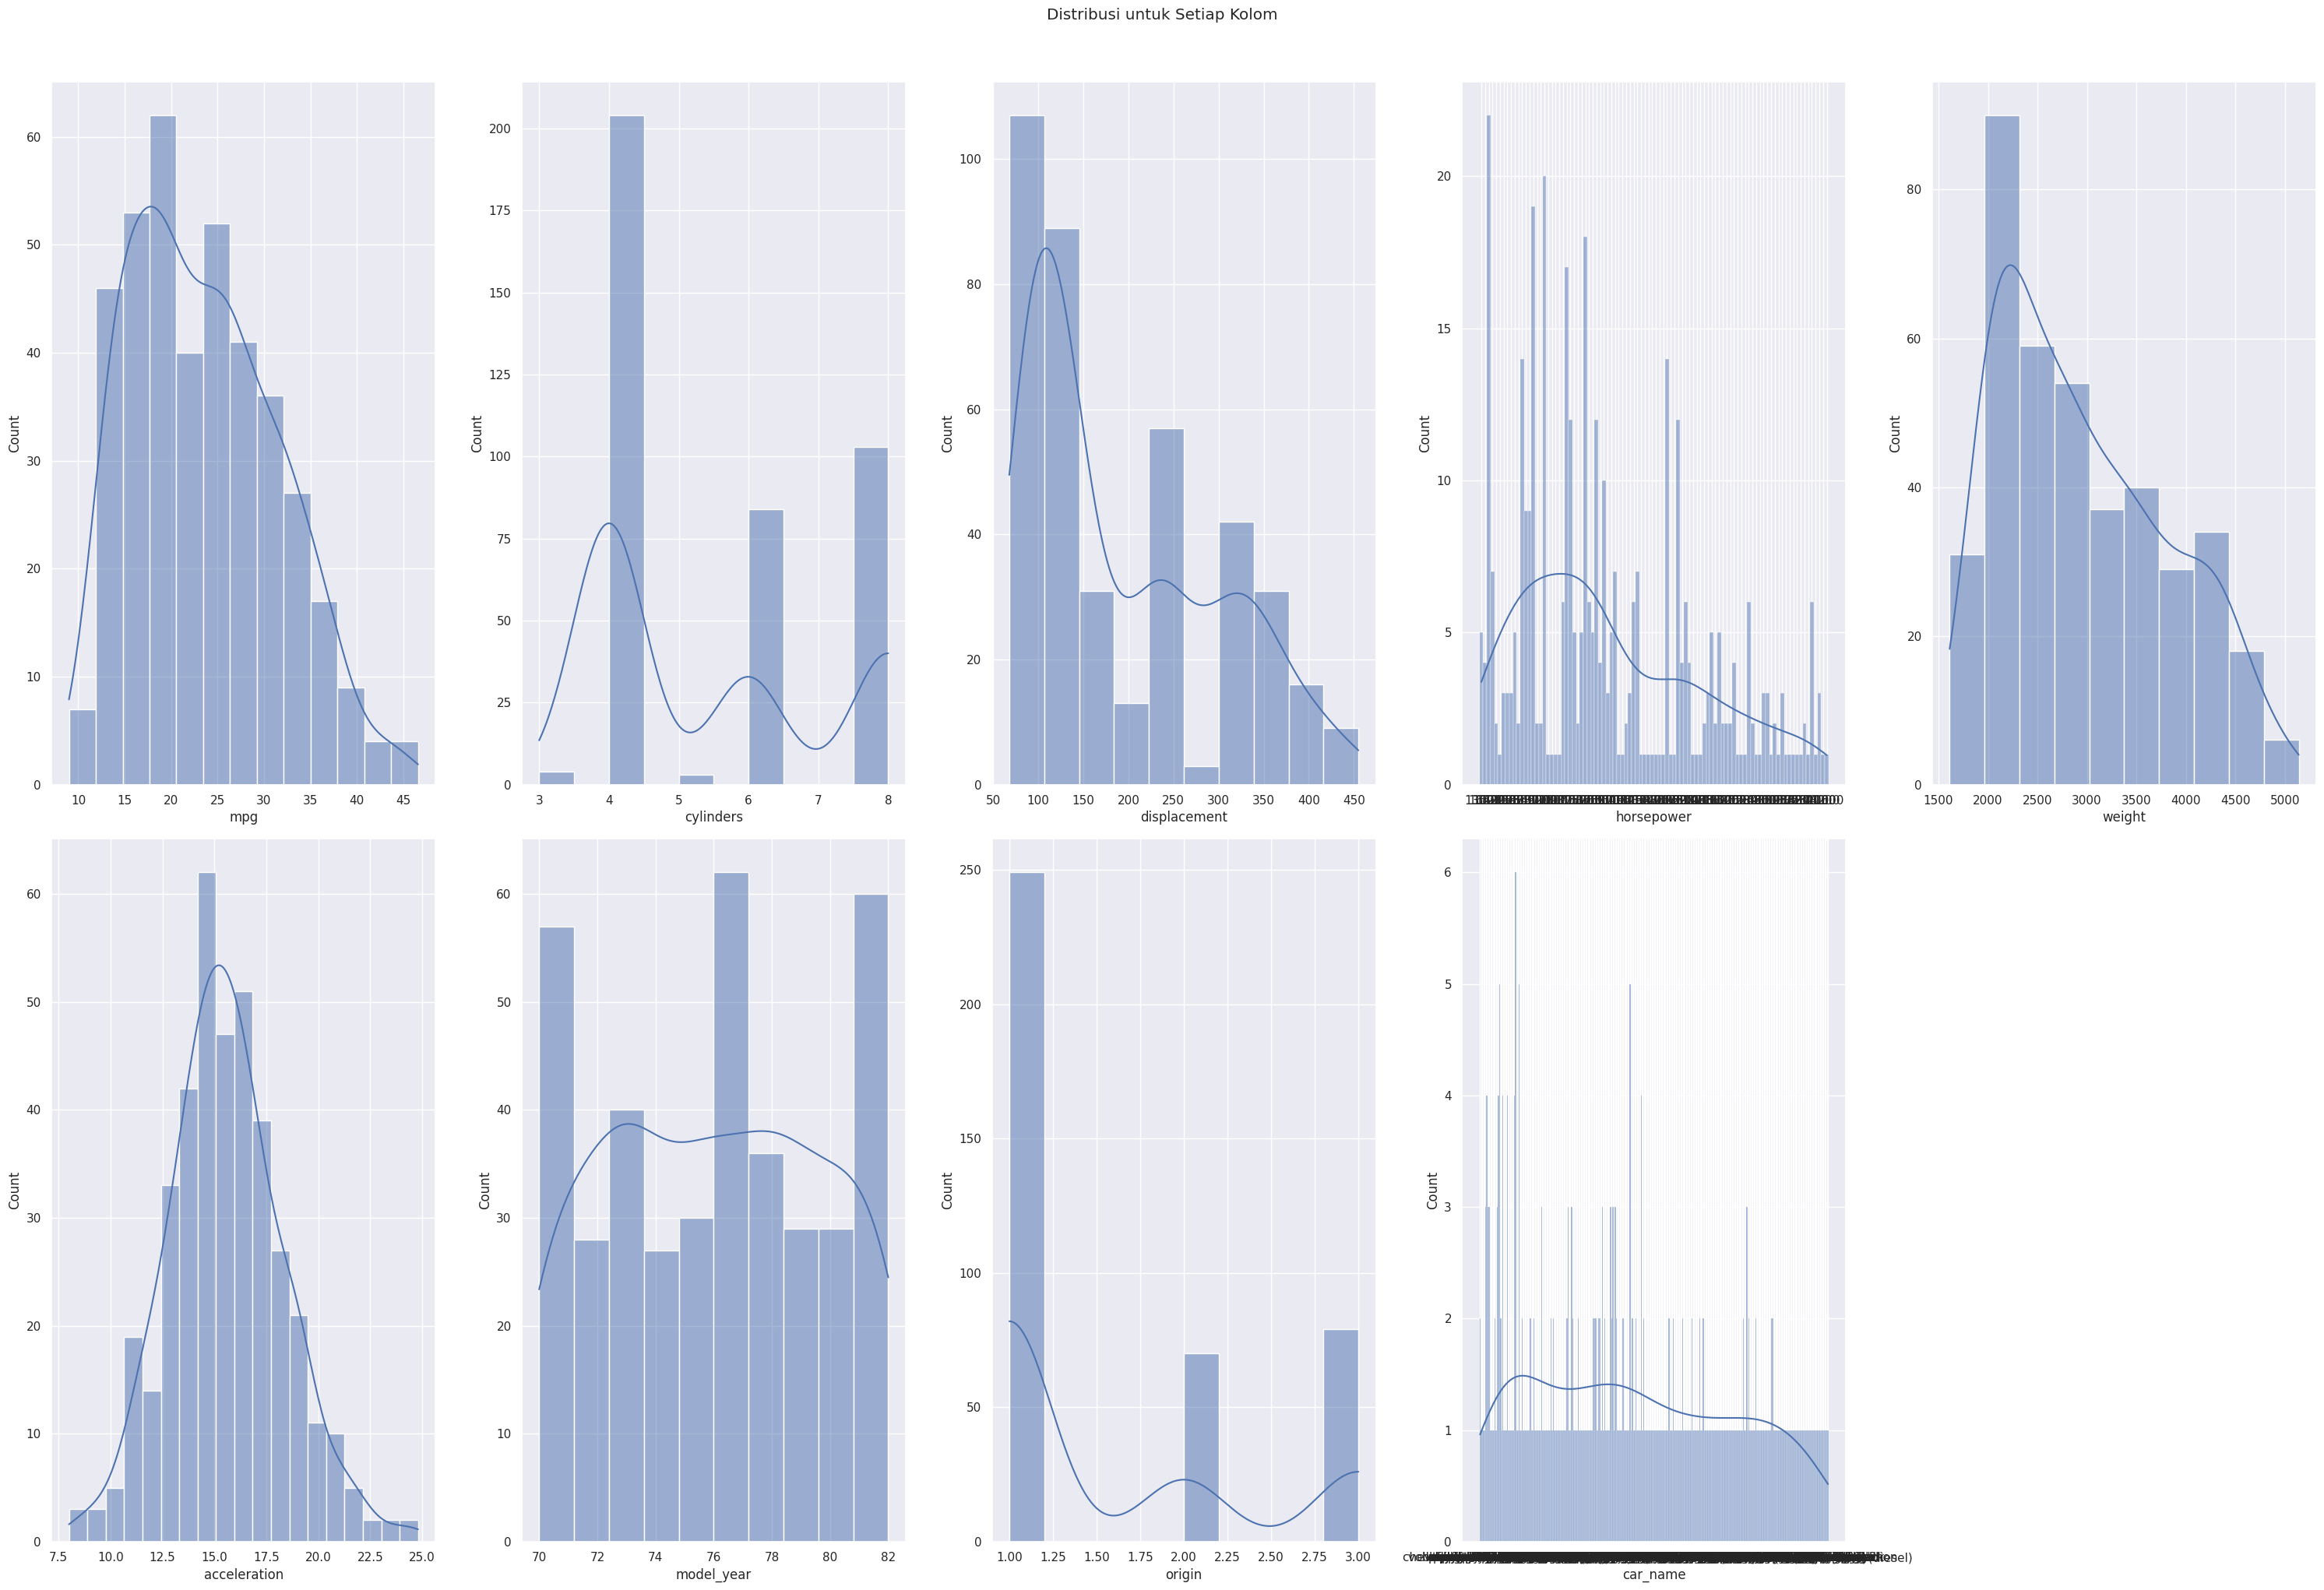

In [7]:
#Cek Distribusi setiap kolom
vis = Visualisasi(df)
vis.distribusi()

In [8]:
total = 0
for i in df['horsepower']:
    if i != '?':
        total += float(i)

mean = total / (len(df)-6)

In [9]:
mean

104.46938775510205

In [10]:
df['horsepower']= df['horsepower'].replace('?',mean)

In [11]:
df['horsepower'] = df['horsepower'].astype(float)

In [12]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [13]:
vis = Visualisasi(df[df.columns[:-1]])

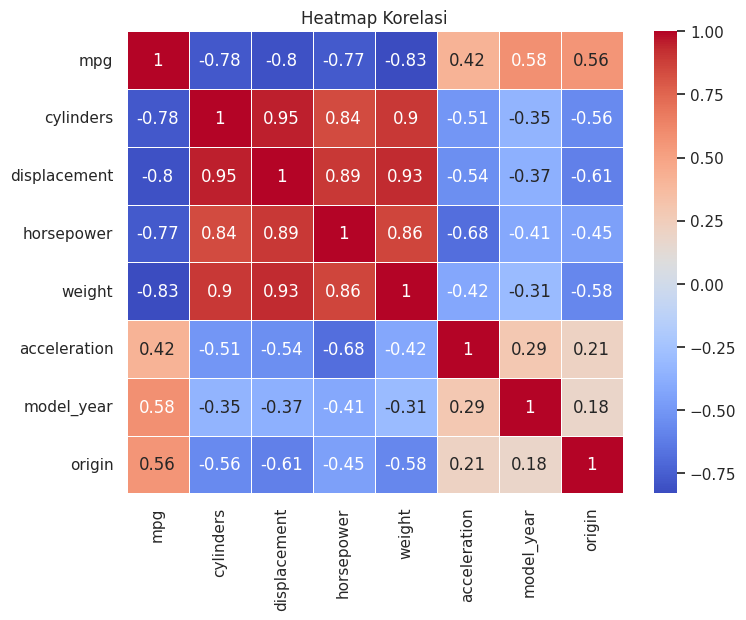

In [14]:
vis.heatmapkor()

In [15]:
df[['car_name','mpg']].groupby('car_name').sum()

,mpg
car_name,
amc ambassador brougham,13.0
amc ambassador dpl,15.0
amc ambassador sst,17.0
amc concord,43.7
amc concord d/l,18.1
...,...
vw dasher (diesel),43.4
vw pickup,44.0
vw rabbit,70.5


In [16]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
df[['mpg','model_year']].groupby('model_year').mean()

,mpg
model_year,
70,17.689655
71,21.250000
72,18.714286
73,17.100000
74,22.703704
75,20.266667
76,21.573529
77,23.375000
78,24.061111


In [18]:
mean_data = df[['mpg','model_year']].groupby('model_year').mean().reset_index()
mean_data

,model_year,mpg
0,70,17.689655
1,71,21.250000
2,72,18.714286
3,73,17.100000
4,74,22.703704
5,75,20.266667
6,76,21.573529
7,77,23.375000
8,78,24.061111
9,79,25.093103


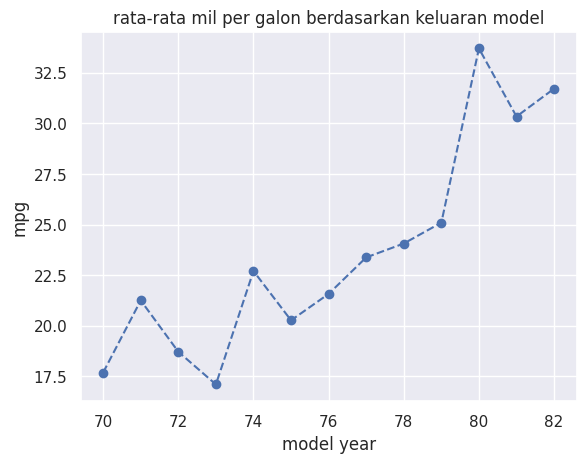

In [19]:
plt.plot(mean_data['model_year'],mean_data['mpg'],marker='o', linestyle='--')
plt.title('rata-rata mil per galon berdasarkan keluaran model')
plt.xlabel('model year')
plt.ylabel('mpg')
plt.show()

In [20]:
df[['mpg','cylinders']].groupby('cylinders').mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [21]:
mean_data_cylinder = df[['mpg','cylinders']].groupby('cylinders').mean().reset_index()
mean_data_cylinder

,cylinders,mpg
0,3,20.550000
1,4,29.286765
2,5,27.366667
3,6,19.985714
4,8,14.963107


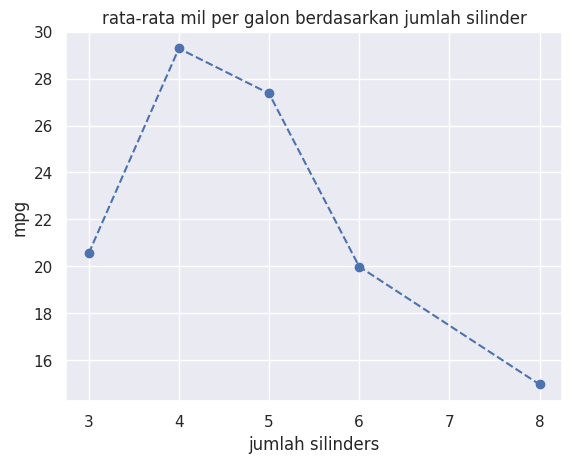

In [22]:
plt.plot(mean_data_cylinder['cylinders'],mean_data_cylinder['mpg'],marker='o', linestyle='--')
plt.title('rata-rata mil per galon berdasarkan jumlah silinder')
plt.xlabel('jumlah silinders')
plt.ylabel('mpg')
plt.show()

In [23]:
colom_continyu = []
for col in df.columns[1:]:
    if df[col].dtype == float:
        colom_continyu.append(col)

colom_continyu

['displacement', 'horsepower', 'weight', 'acceleration']

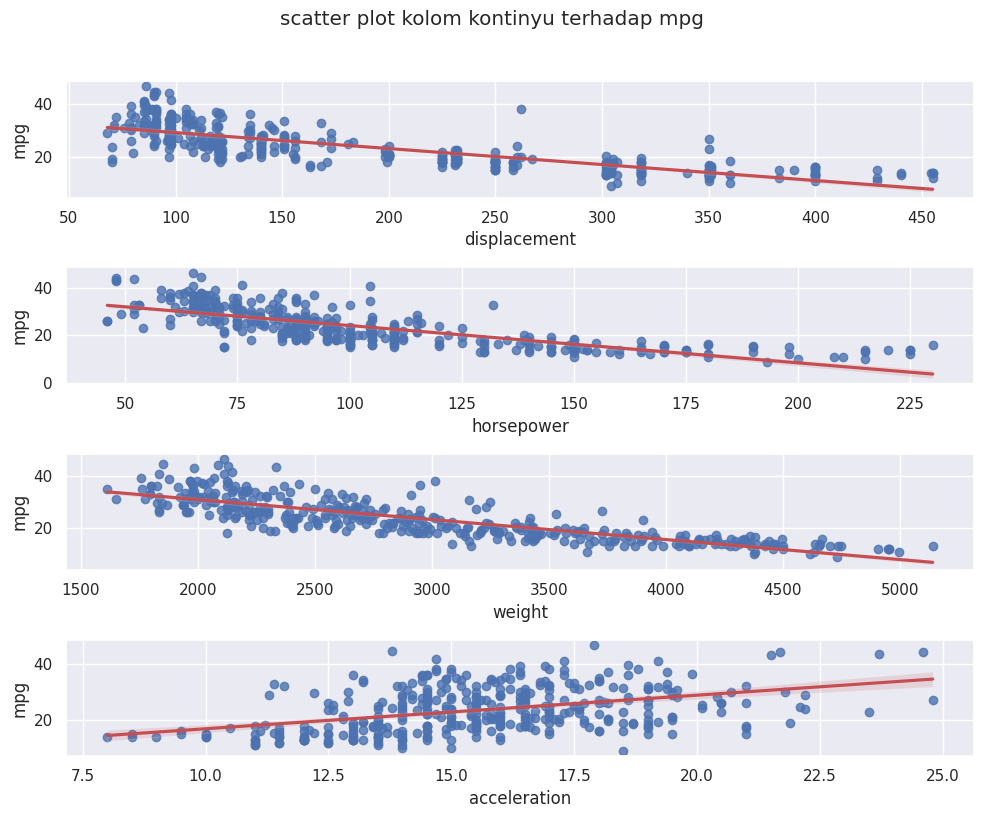

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

# Menempatkan regplot pada setiap subplot
for i, col in enumerate(colom_continyu):
    sns.regplot(x=col, y='mpg', data=df, ax=axes[i],line_kws=dict(color='r'))

# Memberi judul dan menampilkan plot
fig.suptitle('scatter plot kolom kontinyu terhadap mpg', y=1.02)
plt.tight_layout()
plt.show()

In [25]:
def box_plot(data): #fungsi boxplot
    sns.set(rc={'figure.figsize':(38,10)})
    melted_data = pd.melt(data, value_vars=data.columns, var_name="variabel", value_name="value")
    ax = sns.boxplot(x="variabel",y="value",data=melted_data)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

In [26]:
skal = Skalasisasi(df[df.columns[1:-1]])

In [27]:
data_scale = skal.minmax_scaler()

In [28]:
data_scale

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
393,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
394,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
395,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
396,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


/tmp/ipykernel_22180/4119227851.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


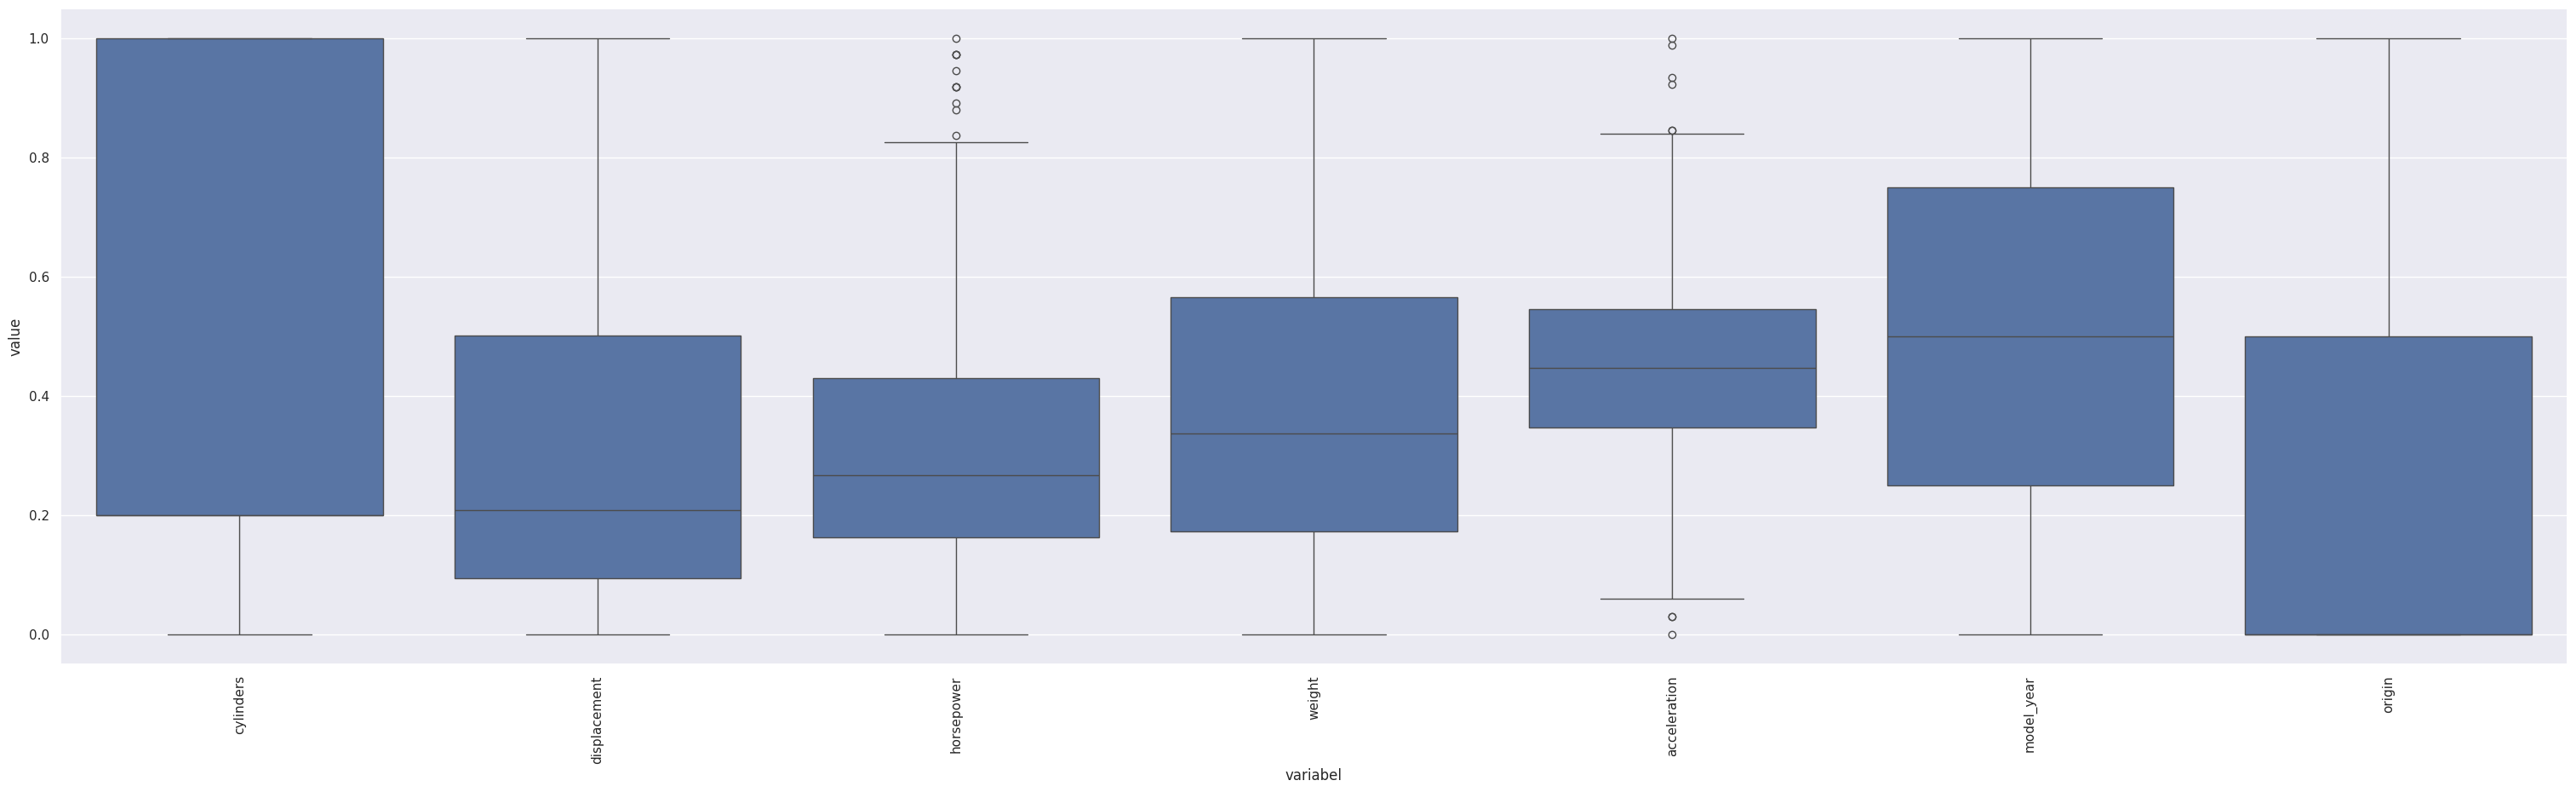

In [29]:
box_plot(data_scale)

#LINK Google Collab </b>
url : https://colab.research.google.com/drive/1cSRqMz9lkTjRVjA7jXuMLZeEZv1jaz5w?usp=sharing